In [1]:
from pennylane import numpy as np
import pennylane as qml
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import random

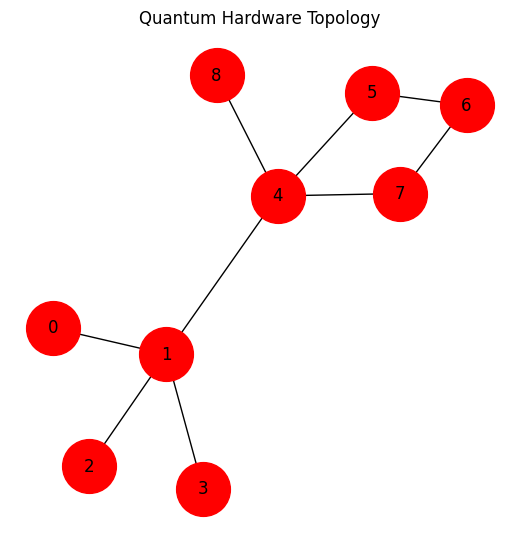

In [2]:
graph = {
    0: [1],
    1: [0, 2, 3, 4],
    2: [1],
    3: [1],
    4: [1, 5, 7, 8],
    5: [4, 6],
    6: [5, 7],
    7: [4, 6],
    8: [4],
}

M = [[0]*9]*9
M = pd.DataFrame(M)
for n in graph.keys():
    for c in graph[n]:
        M[n][c] = 1
        M[c][n] = 1

G = nx.from_pandas_adjacency(pd.DataFrame(M))

fig = plt.figure(figsize=(5, 5))
nx.draw(G, node_size = 1500, labels={node:str(node) for k, node in enumerate(range(0, len(M)))}, with_labels=True, node_color='red')
plt.title("Quantum Hardware Topology")
plt.show()

In [3]:
def n_swaps(cnot):
    """Count the minimum number of swaps needed to create the equivalent CNOT.

    Args:
        - cnot (qml.Operation): A CNOT gate that needs to be implemented on the hardware
        You can find out the wires on which an operator works by asking for the 'wires' attribute: 'cnot.wires'

    Returns:
        - (int): minimum number of swaps
    """

    # QHACK #
    wires = [x for x in cnot.wires]
    edges = graph.copy()
    control = wires[0]  
    target = wires[1]
    # We need to create 2 lists to keep track of visited nodes as we move through the graph and the distances to these nodes from the control qubit
    visited = [0] * len(edges)
    distance = [0] * len(edges)
    Q = [control] # Queue of nodes we can visit from current node
    visited[control] = True
    while len(Q) > 0:
        x = Q.pop(0)
        # Get first element of queue (node x)
        for i in range(len(edges[x])):
          # Iterate through nodes available from node x
            if visited[int(edges[x][i])]:
              # If we have already visited this node, we skip it, since that emans we already have a shorter connection to it
                continue
            # Otherwise the distance to this node i is equal to the current distance to node x, plus 1
            distance[int(edges[x][i])] = distance[x] + 1
            Q.append(int(edges[x][i])) # Add node i to the queue of available nodes
            visited[int(edges[x][i])] = True  # Label node i as visited
    # distance[target] will have the minimum number of edges between the control and target qubits. 
    # To get the number of SWAPS we simply do 2*(edges-1)
    return (distance[target]-1)*2

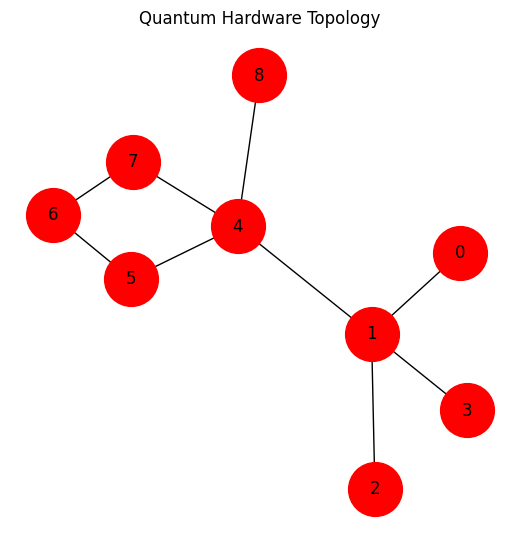

To apply a CNOT gate between qubits 0 and 1 we need 0 SWAP gates.
To apply a CNOT gate between qubits 0 and 2 we need 2 SWAP gates.
To apply a CNOT gate between qubits 0 and 3 we need 2 SWAP gates.
To apply a CNOT gate between qubits 0 and 4 we need 2 SWAP gates.
To apply a CNOT gate between qubits 0 and 5 we need 4 SWAP gates.
To apply a CNOT gate between qubits 0 and 6 we need 6 SWAP gates.
To apply a CNOT gate between qubits 0 and 7 we need 4 SWAP gates.
To apply a CNOT gate between qubits 0 and 8 we need 4 SWAP gates.
To apply a CNOT gate between qubits 1 and 2 we need 0 SWAP gates.
To apply a CNOT gate between qubits 1 and 3 we need 0 SWAP gates.
To apply a CNOT gate between qubits 1 and 4 we need 0 SWAP gates.
To apply a CNOT gate between qubits 1 and 5 we need 2 SWAP gates.
To apply a CNOT gate between qubits 1 and 6 we need 4 SWAP gates.
To apply a CNOT gate between qubits 1 and 7 we need 2 SWAP gates.
To apply a CNOT gate between qubits 1 and 8 we need 2 SWAP gates.
To apply a

In [5]:
fig = plt.figure(figsize=(5, 5))
nx.draw(G, node_size = 1500, labels={node:str(node) for k, node in enumerate(range(0, len(M)))}, with_labels=True, node_color='red')
plt.title("Quantum Hardware Topology")
plt.show()

for i in range(0, 9):
    for j in range(i,9):
        if i == j:
            continue
        inputs = [i, j]
        output = n_swaps(qml.CNOT(wires=[int(i) for i in inputs]))
        print(f"To apply a CNOT gate between qubits {inputs[0]} and {inputs[1]} we need {output} SWAP gates.")